In [1]:
!pip install snscrape


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
query="tesla"
tweets=[]
limit=2000


In [4]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append(tweet.content)
        
#create a dataframe with column called tweets
df1=df=pd.DataFrame(tweets,columns=['tweet'])

In [5]:
print(df)

                                                  tweet
0              @DeBergerXXX Een Tesla is altijd fout 🤣🤣
1     @ilblog @Tesla @elonmusk Opomenout SpaceX a  n...
2     'CNBC’s David Faber reported that Tesla CEO El...
3     FF 91 все-таки выйдет в свет\n\nКомпания получ...
4        @howmanysmaII that's a lot better than a tesla
...                                                 ...
1995  @TheQuartering And make sure you all get your ...
1996  @AkiPajunoja Jatkan Twitterin käyttöä, mutta m...
1997  @DerbyshireRPU Seen loads of Tesla's around Mc...
1998            @laskowski_pl Musk będzie drugim Teslą.
1999  @MyGineration A huge reduction/change in staff...

[2000 rows x 1 columns]


In [6]:
#function to clean the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#remove s@mentions
    text=re.sub(r'#','',text) #removes #
    text=re.sub(r'RT[\s]+','',text) #removes RT
    text=re.sub(r'https?:\/\/\S+','',text) #removes hyperlinks
    return text
#cleaning the text
df['tweet']=df['tweet'].apply(cleanTxt)

In [7]:
df

,tweet
0,Een Tesla is altijd fout 🤣🤣
1,Opomenout SpaceX a nevyjádřit důvěru v zář...
2,'CNBC’s David Faber reported that Tesla CEO El...
3,FF 91 все-таки выйдет в свет\n\nКомпания получ...
4,that's a lot better than a tesla
...,...
1995,And make sure you all get your own corporate ...
1996,"Jatkan Twitterin käyttöä, mutta mielestäni Mu..."
1997,Seen loads of Tesla's around Mcarthur Glen ru...
1998,_pl Musk będzie drugim Teslą.


In [8]:
#function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
#create two new columns related to subjectivity and polarity
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

In [10]:
df

,tweet,Subjectivity,Polarity
0,Een Tesla is altijd fout 🤣🤣,0.00000,0.000000
1,Opomenout SpaceX a nevyjádřit důvěru v zář...,0.00000,0.000000
2,'CNBC’s David Faber reported that Tesla CEO El...,0.00000,0.000000
3,FF 91 все-таки выйдет в свет\n\nКомпания получ...,0.00000,0.000000
4,that's a lot better than a tesla,0.50000,0.500000
...,...,...,...
1995,And make sure you all get your own corporate ...,0.62963,0.366667
1996,"Jatkan Twitterin käyttöä, mutta mielestäni Mu...",0.00000,0.000000
1997,Seen loads of Tesla's around Mcarthur Glen ru...,0.65000,0.350000
1998,_pl Musk będzie drugim Teslą.,0.00000,0.000000


In [11]:
#function to compute positive,negative,neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [12]:
df

,tweet,Subjectivity,Polarity,Analysis
0,Een Tesla is altijd fout 🤣🤣,0.00000,0.000000,Neutral
1,Opomenout SpaceX a nevyjádřit důvěru v zář...,0.00000,0.000000,Neutral
2,'CNBC’s David Faber reported that Tesla CEO El...,0.00000,0.000000,Neutral
3,FF 91 все-таки выйдет в свет\n\nКомпания получ...,0.00000,0.000000,Neutral
4,that's a lot better than a tesla,0.50000,0.500000,Positive
...,...,...,...,...
1995,And make sure you all get your own corporate ...,0.62963,0.366667,Positive
1996,"Jatkan Twitterin käyttöä, mutta mielestäni Mu...",0.00000,0.000000,Neutral
1997,Seen loads of Tesla's around Mcarthur Glen ru...,0.65000,0.350000,Positive
1998,_pl Musk będzie drugim Teslą.,0.00000,0.000000,Neutral


In [13]:
#Print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1) that's a lot better than a tesla

2)Let's GOOOOO!!🎯💯🤙🏽


After months of legal drama, Elon Musk has  begun his takeover of Twitter. The service could change dramatically under the Tesla CEO's leadership.

3) Elon Musk needs to have his engineers fix the broken customer service experience (or lack thereof at Tesla Solar).  That would be a better use of their time.

4)What will happen to the good man  if he disappear ..
What will haplen to
 
 


5)“Gli scienziati odierni hanno sostituito gli esperimenti con la matematica e vagano smarriti equazione dopo equazione e alla fine costruiscono una struttura che non ha relazione con la realtà.” 
Nikola Tesla 

6) Oops j'ai double click et Oh bizarre ! Pas de logo Tesla?! Je me demande bien pourquoi !

7)   Not ones that have operated at scale, clearly. My Tesla app has had two outages in the 1.5 weeks I’ve had my Powerwalls.

8) Could Tesla engineers review Cosmos  code too? Seems like they also have a good amount of security audit experienc

In [14]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)(System alert) 
This tweet has been deleted due to a violation of Tesla's supremacy law.

2)Other
FinancialMarkets Manufacturing 
SomewhatBullish
$TSLA 
2022/10/28 18:24
Tesla Faces DOJ, SEC Probes Over Autopilot Technology: Reports


3)SEC, DOJ Probe Tesla Over Statements About Autopilot 

4) You’re so full of crap. He trolled because the accusation was absurd. Tesla doesn’t need/want/use Bolivian lithium. Strop misleading simpleminded potheads

5)Facebook is almost dead.

The entire world politics and finance will be discussed on Twitter. 

Eternal Criticism is what makes a company lose its value.

Tesla, Boring and SpaceX can bring the Elon empire down. 

Anyone saying anything to them will be wiped from here.

6) Tesla bulls will take this as a reason to buy the stock rather than recognise that it means all of the European car companies will be focusing solely on EVs now and competing down TSLA margins.

7) literally, like i would rather sob in my million dollar triple story apar

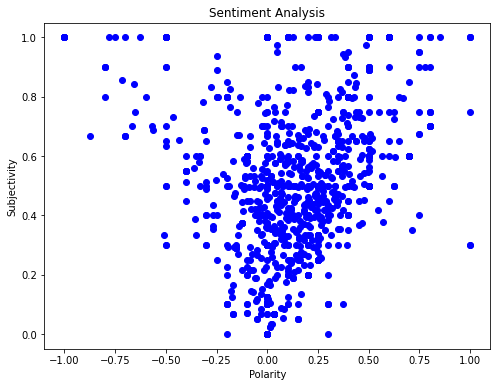

In [15]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [16]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweet']
pos=round((ptweets.shape[0]/df.shape[0]*100),11)
print(pos)


32.7


In [17]:
#Get the percentage of NEGATIVE tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['tweet']
neg=round((ptweets.shape[0]/df.shape[0]*100),11)
print(neg)

11.95


In [18]:
#Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['tweet']
neu=round((ptweets.shape[0]/df.shape[0]*100),11)
print(neu)

55.35


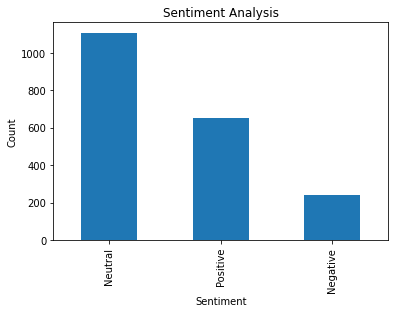

In [19]:
#show the value count
df['Analysis'].value_counts()

#plot and visualize the count
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [20]:


if(neu<pos or (neu>pos and pos<neg) ):
    print("Dont buy the stock!!")
    print("Here are some negative tweets about the stock that may help you consider not to buy!!")
    j=1
    sortedDF=df.sort_values(by=['Polarity'],ascending=False)
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Negative') and j<=10:
            print(str(j)+')'+df1['tweet'][i])
            j+=1

elif(neu>pos and pos>neg):
    print("Buy the stock!!")
    print("Here are some positive tweets about the stock that may help you  consider buying!!")
    j=1
    sortedDF=df.sort_values(by=['Polarity'])
    
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Positive') and j<=10:
            print(str(j)+')'+df1['tweet'][i])
            j+=1

    
#elif(neu>pos and pos<neg):
    #print("Dont buy the stock!!")

Buy the stock!!
Here are some positive tweets about the stock that may help you  consider buying!!
1) that's a lot better than a tesla
2)Let's GOOOOO!!🎯💯🤙🏽


After months of legal drama, Elon Musk has  begun his takeover of Twitter. The service could change dramatically under the Tesla CEO's leadership.
3) Elon Musk needs to have his engineers fix the broken customer service experience (or lack thereof at Tesla Solar).  That would be a better use of their time.
4)What will happen to the good man  if he disappear ..
What will haplen to
 
 

5)“Gli scienziati odierni hanno sostituito gli esperimenti con la matematica e vagano smarriti equazione dopo equazione e alla fine costruiscono una struttura che non ha relazione con la realtà.” 
Nikola Tesla 
6) Oops j'ai double click et Oh bizarre ! Pas de logo Tesla?! Je me demande bien pourquoi !
7)   Not ones that have operated at scale, clearly. My Tesla app has had two outages in the 1.5 weeks I’ve had my Powerwalls.
8) Could Tesla engineers 